In [216]:
import pylab as plt
import numpy as np
import pandas as pd
import scipy.stats as stat
import corner
import copy
import MCMC1
import time
from IPython.display import display, Math, Latex
import matplotlib.colors as mcolors


%matplotlib nbagg
%matplotlib inline
np.random.seed(1)
plt.style.use('classic')

### Prior Distributions

- Uniform distribution on source location
- Extended power law of the source fluxes
- Poisson distribution on the number of point sources

### Gaussian Likelihood

In [247]:
mean = [2,10]
cov = [[1,0],[0,1]]

In [269]:
x = np.linspace(1,5,10000)
Flux = np.random.normal(x,5)

In [270]:
data = np.random.multivariate_normal(mean,cov,size=10000)

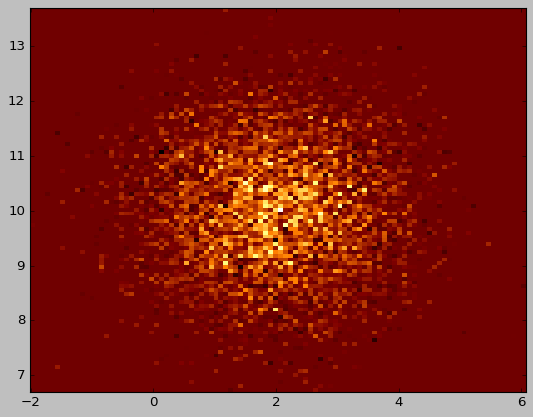

In [275]:
plt.hist2d(data[:,0],data[:,1],bins=100,weights=Flux,cmap='afmhot');
